# STS(Semantic Textual Similarity)
## 데이터 불러오기
- KLUE-STS data

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import numpy as np
import torch

In [2]:
train_ = pd.read_json('./klue-sts-v1.1/klue-sts-v1.1_train.json') # 11668x6
test_ = pd.read_json('./klue-sts-v1.1/klue-sts-v1.1_dev.json')    # 519x6

In [3]:
train_.head()

,guid,source,sentence1,sentence2,labels,annotations
0,klue-sts-v1_train_00000,airbnb-rtt,숙소 위치는 찾기 쉽고 일반적인 한국의 반지하 숙소입니다.,숙박시설의 위치는 쉽게 찾을 수 있고 한국의 대표적인 반지하 숙박시설입니다.,"{'label': 3.7, 'real-label': 3.714285714285714...","{'agreement': '0:0:0:2:5:0', 'annotators': ['0..."
1,klue-sts-v1_train_00001,policy-sampled,위반행위 조사 등을 거부·방해·기피한 자는 500만원 이하 과태료 부과 대상이다.,시민들 스스로 자발적인 예방 노력을 한 것은 아산 뿐만이 아니었다.,"{'label': 0.0, 'real-label': 0.0, 'binary-labe...","{'agreement': '5:0:0:0:0:0', 'annotators': ['1..."
2,klue-sts-v1_train_00002,paraKQC-sampled,회사가 보낸 메일은 이 지메일이 아니라 다른 지메일 계정으로 전달해줘.,사람들이 주로 네이버 메일을 쓰는 이유를 알려줘,"{'label': 0.30000000000000004, 'real-label': 0...","{'agreement': '4:2:0:0:0:0', 'annotators': ['1..."
3,klue-sts-v1_train_00003,policy-sampled,"긴급 고용안정지원금은 지역고용대응 등 특별지원금, 지자체별 소상공인 지원사업, 취업...","고용보험이 1차 고용안전망이라면, 국민취업지원제도는 2차 고용안전망입니다.","{'label': 0.6000000000000001, 'real-label': 0....","{'agreement': '4:2:1:0:0:0', 'annotators': ['1..."
4,klue-sts-v1_train_00004,airbnb-rtt,"호스트의 답장이 늦으나, 개선될 것으로 보입니다.",호스트 응답이 늦었지만 개선될 것으로 보입니다.,"{'label': 4.7, 'real-label': 4.714285714285714...","{'agreement': '0:0:0:0:2:5', 'annotators': ['1..."


In [4]:
train_.isnull().sum()        # 결측값 확인

guid           0
source         0
sentence1      0
sentence2      0
labels         0
annotations    0
dtype: int64

In [5]:
test_.isnull().sum()

guid           0
source         0
sentence1      0
sentence2      0
labels         0
annotations    0
dtype: int64

In [6]:
# sentence1, sentence2, labels(binary) 만 사용
train = train_[['sentence1', 'sentence2', 'labels']]
test = test_[['sentence1', 'sentence2', 'labels']]
train.head()

,sentence1,sentence2,labels
0,숙소 위치는 찾기 쉽고 일반적인 한국의 반지하 숙소입니다.,숙박시설의 위치는 쉽게 찾을 수 있고 한국의 대표적인 반지하 숙박시설입니다.,"{'label': 3.7, 'real-label': 3.714285714285714..."
1,위반행위 조사 등을 거부·방해·기피한 자는 500만원 이하 과태료 부과 대상이다.,시민들 스스로 자발적인 예방 노력을 한 것은 아산 뿐만이 아니었다.,"{'label': 0.0, 'real-label': 0.0, 'binary-labe..."
2,회사가 보낸 메일은 이 지메일이 아니라 다른 지메일 계정으로 전달해줘.,사람들이 주로 네이버 메일을 쓰는 이유를 알려줘,"{'label': 0.30000000000000004, 'real-label': 0..."
3,"긴급 고용안정지원금은 지역고용대응 등 특별지원금, 지자체별 소상공인 지원사업, 취업...","고용보험이 1차 고용안전망이라면, 국민취업지원제도는 2차 고용안전망입니다.","{'label': 0.6000000000000001, 'real-label': 0...."
4,"호스트의 답장이 늦으나, 개선될 것으로 보입니다.",호스트 응답이 늦었지만 개선될 것으로 보입니다.,"{'label': 4.7, 'real-label': 4.714285714285714..."


In [7]:
for x in range(len(train)):
    train['labels'][x] = train['labels'][x]['binary-label']
    
for x in range(len(test)):
    test['labels'][x] = test['labels'][x]['binary-label']

C:\Users\Yong\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Yong\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [8]:
print(train.shape, test.shape)

train.head()

(11668, 3) (519, 3)


,sentence1,sentence2,labels
0,숙소 위치는 찾기 쉽고 일반적인 한국의 반지하 숙소입니다.,숙박시설의 위치는 쉽게 찾을 수 있고 한국의 대표적인 반지하 숙박시설입니다.,1
1,위반행위 조사 등을 거부·방해·기피한 자는 500만원 이하 과태료 부과 대상이다.,시민들 스스로 자발적인 예방 노력을 한 것은 아산 뿐만이 아니었다.,0
2,회사가 보낸 메일은 이 지메일이 아니라 다른 지메일 계정으로 전달해줘.,사람들이 주로 네이버 메일을 쓰는 이유를 알려줘,0
3,"긴급 고용안정지원금은 지역고용대응 등 특별지원금, 지자체별 소상공인 지원사업, 취업...","고용보험이 1차 고용안전망이라면, 국민취업지원제도는 2차 고용안전망입니다.",0
4,"호스트의 답장이 늦으나, 개선될 것으로 보입니다.",호스트 응답이 늦었지만 개선될 것으로 보입니다.,1


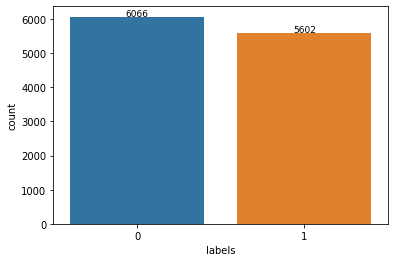

In [9]:
ax = sns.countplot(data = train, x ='labels')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height+3, height, ha='center', size=9)

plt.show()

## 데이터 추가

## KorNLU Datasets
- KorNLI and KorSTS datasets in Korean
- https://github.com/kakaobrain/KorNLUDatasets
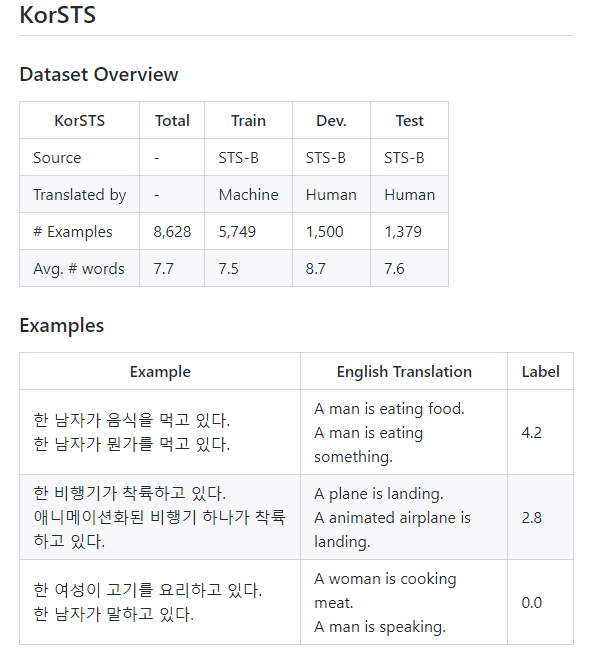

In [10]:
# ParserError: Error tokenizing data. C error:오류
# -> 각 라인마다 분리되는 개수가 달라서 발생
# -> 해결방법 : 파일을 먼저 읽은후에 dataframe형식으로 만들기

In [11]:
# train_add = pd.read_csv('./KorSTS/sts-train.tsv', delimiter='\t', error_bad_lines=False)
# error_bad_lines = False이면 오류가 발생한줄을 빼고 처리함 5696개
# tab(\t)이아닌 띄어쓰기가 적용된걸로 보임

In [12]:
f= open('./KorSTS/sts-train.tsv', encoding='utf-8')
f1= open('./KorSTS/sts-dev.tsv', encoding='utf-8')
f2= open('./KorSTS/sts-test.tsv', encoding='utf-8')

rdr = csv.reader(f, delimiter='\t')
rdr1 = csv.reader(f1, delimiter='\t')
rdr2 = csv.reader(f2, delimiter='\t')
train_tsv = []
dev_tsv = []
test_tsv = []
for i in rdr:
    train_tsv.append(i)
for i in rdr1:
    dev_tsv.append(i)
for i in rdr2:
    test_tsv.append(i)
    
f.close()
f1.close()
f2.close()
train_df = pd.DataFrame(train_tsv)
dev_df = pd.DataFrame(dev_tsv)
test_df = pd.DataFrame(test_tsv)

train_df.shape, dev_df.shape, test_df.shape

((5704, 8), (1472, 8), (1380, 7))

In [13]:
train_df.head()

,0,1,2,3,4,5,6,7
0,genre,filename,year,id,score,sentence1,sentence2,None
1,main-captions,MSRvid,2012test,0001,5.000,비행기가 이륙하고 있다.,비행기가 이륙하고 있다.,None
2,main-captions,MSRvid,2012test,0004,3.800,한 남자가 큰 플루트를 연주하고 있다.,남자가 플루트를 연주하고 있다.,None
3,main-captions,MSRvid,2012test,0005,3.800,한 남자가 피자에 치즈를 뿌려놓고 있다.,한 남자가 구운 피자에 치즈 조각을 뿌려놓고 있다.,None
4,main-captions,MSRvid,2012test,0006,2.600,세 남자가 체스를 하고 있다.,두 남자가 체스를 하고 있다.,None


In [14]:
# 행을 column으로 + 필요한 column만
train_df.rename(columns=train_df.iloc[0], inplace=True)
train_df.drop(train_df.index[0], inplace=True)
train_df = train_df[['sentence1', 'sentence2', 'score']]

dev_df.rename(columns=dev_df.iloc[0], inplace=True)
dev_df.drop(dev_df.index[0], inplace=True)
dev_df = dev_df[['sentence1', 'sentence2', 'score']]

test_df.rename(columns=test_df.iloc[0], inplace=True)
test_df.drop(test_df.index[0], inplace=True)
test_df = test_df[['sentence1', 'sentence2', 'score']]

print(train_df.shape, dev_df.shape, test_df.shape)
train_df.head()

(5703, 3) (1471, 3) (1379, 3)


,sentence1,sentence2,score
1,비행기가 이륙하고 있다.,비행기가 이륙하고 있다.,5.000
2,한 남자가 큰 플루트를 연주하고 있다.,남자가 플루트를 연주하고 있다.,3.800
3,한 남자가 피자에 치즈를 뿌려놓고 있다.,한 남자가 구운 피자에 치즈 조각을 뿌려놓고 있다.,3.800
4,세 남자가 체스를 하고 있다.,두 남자가 체스를 하고 있다.,2.600
5,한 남자가 첼로를 연주하고 있다.,자리에 앉은 남자가 첼로를 연주하고 있다.,4.250


In [15]:
train_df.isnull().sum()

sentence1    0
sentence2    5
score        0
dtype: int64

In [16]:
dev_df.isnull().sum()

sentence1    0
sentence2    1
score        0
dtype: int64

In [17]:
test_df.isnull().sum()

sentence1    0
sentence2    3
score        0
dtype: int64

In [18]:
# 결측치 제거
train_df.dropna(axis=0, inplace=True)
dev_df.dropna(axis=0, inplace=True)
test_df.dropna(axis=0, inplace=True)

print(train_df.shape, dev_df.shape, test_df.shape)

(5698, 3) (1470, 3) (1376, 3)


In [19]:
# score(label) to numeric
train_df['score'] = pd.to_numeric(train_df['score'], errors='raise')
dev_df['score'] = pd.to_numeric(dev_df['score'], errors='raise')
test_df['score'] = pd.to_numeric(test_df['score'], errors='raise')

In [20]:
# label값 0,1
train_df['score'] = (train_df['score'] >3.0).astype(int)
dev_df['score'] = (dev_df['score'] >3.0).astype(int)
test_df['score'] = (test_df['score'] >3.0).astype(int)

train_df.head()

,sentence1,sentence2,score
1,비행기가 이륙하고 있다.,비행기가 이륙하고 있다.,1
2,한 남자가 큰 플루트를 연주하고 있다.,남자가 플루트를 연주하고 있다.,1
3,한 남자가 피자에 치즈를 뿌려놓고 있다.,한 남자가 구운 피자에 치즈 조각을 뿌려놓고 있다.,1
4,세 남자가 체스를 하고 있다.,두 남자가 체스를 하고 있다.,0
5,한 남자가 첼로를 연주하고 있다.,자리에 앉은 남자가 첼로를 연주하고 있다.,1


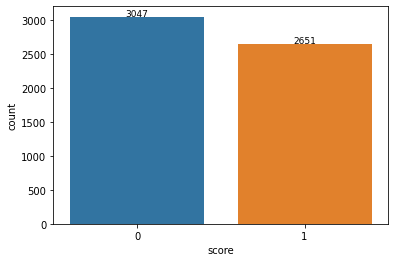

In [21]:
ax = sns.countplot(data = train_df, x ='score')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height+3, height, ha='center', size=9)

plt.show()

#### 두 문장을 함께 인코딩하는 cross-encoding
- 두 문장을 하나의 입력으로 처리
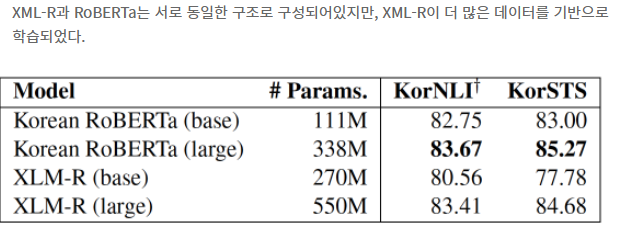

#### 두 문장을 별개로 인코딩하는 bi-encoding
- 큰 데이터셋에 대해서 pairwise similarity 계산비용이 적게듬
- 각 문장의 임베딩은 해당문장의 단어 임베딩의 평균값 사용
- 입력으로 제공된 두 문장의 코사인 유사도를 통해 결과예측
- 사전학습되지 않은 모델을 먼저고려한 후 사전학습된 모델을 사용하는 경우도 고려
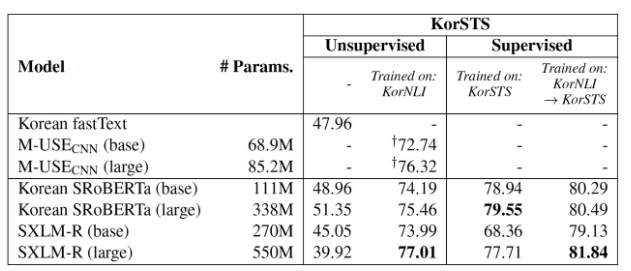